## Loading in Data

In [116]:
import pandas as pd
import numpy as np

import tensorflow as tf
import os

import matplotlib.pyplot as plt

Loading Images

In [39]:
data = tf.keras.utils.image_dataset_from_directory(r"D:\Python Project\Image Classification\Pneumonia\chest_xray\chest_xray\data")

Found 5856 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [4]:
#Images as an array

batch[0].shape

(32, 256, 256, 3)

In [5]:
#Image Labels
batch[1]

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

From here we have loaded our images and see that normal conditions = 0, and pneumonia conditions are coded as 1

## Preprocessing Data

#### Scaling Data between 0 and 1

In [40]:
data = data.map(lambda x,y: (x/255, y))

In [41]:
batch = data.as_numpy_iterator().next()

In [42]:
batch[0].max()

1.0

In [44]:
batch[0].min()

0.0

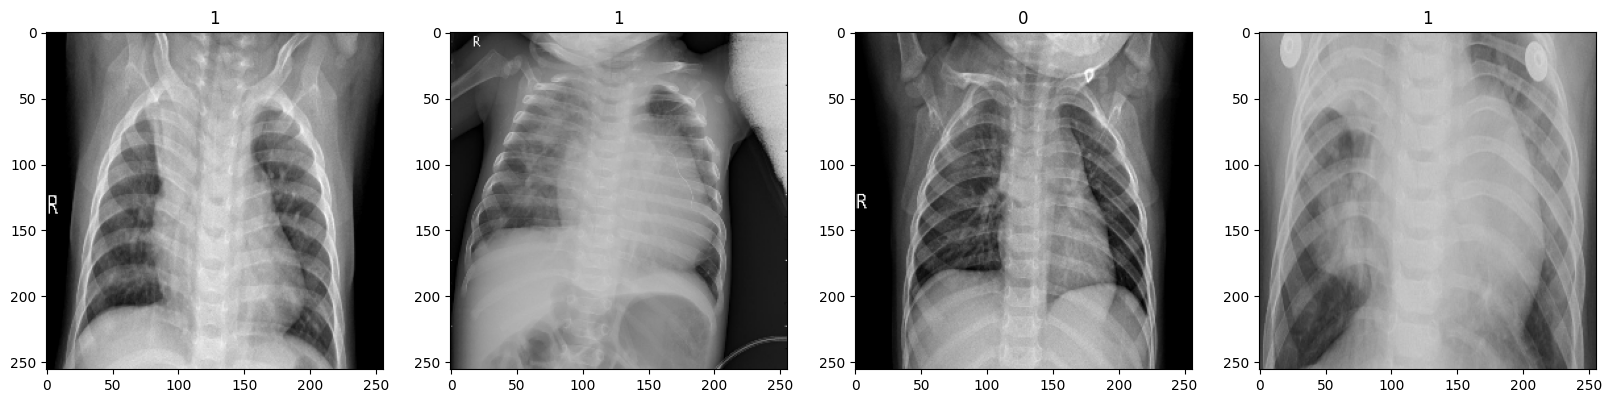

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Splitting Data into Training and Testing Split

In [49]:
#Calculating Batch Count
len(data)

183

In [65]:
#Shuffling Data
data = data.shuffle(buffer_size=1000)

In [66]:
#Creating Splits
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) +1

In [67]:
train_size + val_size + test_size

183

In [68]:
#Allocating Batches
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [69]:
len(train) + len(val) + len(test)

183

### Building Convulution Neural Network

In [94]:
#Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [98]:
model = Sequential()

In [99]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation= "sigmoid"))

In [101]:
model.compile('adam', loss="binary_crossentropy", metrics = ['accuracy'])

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 16)       

### Training Model

In [103]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
128/128 [==============================] - 109s 550ms/step - loss: 0.2484 - accuracy: 0.8994 - val_loss: 0.2001 - val_accuracy: 0.9193
Epoch 2/20
128/128 [==============================] - 80s 558ms/step - loss: 0.1472 - accuracy: 0.9475 - val_loss: 0.1438 - val_accuracy: 0.9497
Epoch 3/20
128/128 [==============================] - 79s 554ms/step - loss: 0.1257 - accuracy: 0.9531 - val_loss: 0.1290 - val_accuracy: 0.9505
Epoch 4/20
128/128 [==============================] - 79s 549ms/step - loss: 0.1059 - accuracy: 0.9592 - val_loss: 0.1434 - val_accuracy: 0.9479
Epoch 5/20
128/128 [==============================] - 78s 546ms/step - loss: 0.1000 - accuracy: 0.9644 - val_loss: 0.0768 - val_accuracy: 0.9740
Epoch 6/20
128/128 [==============================] - 79s 549ms/step - loss: 0.0842 - accuracy: 0.9680 - val_loss: 0.0765 - val_accuracy: 0.9748
Epoch 7/20
128/128 [==============================] - 78s 547ms/step - loss: 0.0829 - accuracy: 0.9714 - val_loss: 0.0516 - val_a

In [111]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [112]:
hist.history

{'loss': [0.24838079512119293,
  0.14721393585205078,
  0.12567512691020966,
  0.10590054094791412,
  0.10001152753829956,
  0.0841953456401825,
  0.08286987245082855,
  0.06217324733734131,
  0.05407797545194626,
  0.054607126861810684,
  0.044888220727443695,
  0.03575768321752548,
  0.028565334156155586,
  0.0229742880910635,
  0.021313238888978958,
  0.010529215447604656,
  0.006848120130598545,
  0.0050311582162976265,
  0.009270057082176208,
  0.0027178421150892973],
 'accuracy': [0.8994140625,
  0.947509765625,
  0.953125,
  0.959228515625,
  0.96435546875,
  0.968017578125,
  0.971435546875,
  0.97705078125,
  0.97998046875,
  0.981201171875,
  0.984130859375,
  0.986083984375,
  0.990966796875,
  0.99169921875,
  0.99072265625,
  0.996826171875,
  0.997802734375,
  0.99853515625,
  0.996826171875,
  0.999267578125],
 'val_loss': [0.20009584724903107,
  0.14378511905670166,
  0.12903788685798645,
  0.14340020716190338,
  0.0768086165189743,
  0.07649155706167221,
  0.0516212284

#### Plotting Results over time

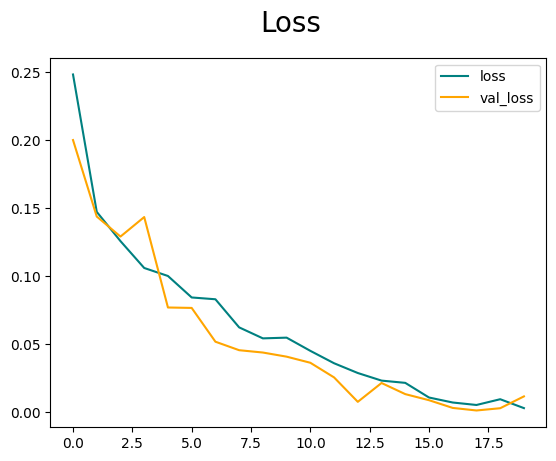

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend()
plt.show()

### Performance on Test Set

In [127]:
re = tf.keras.metrics.Recall()
pre = tf.keras.metrics.Precision()
acc = tf.keras.metrics.BinaryAccuracy()

In [129]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002C1D4C63E20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002C1D4C63E20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

In [133]:
print(f'''Precision: {pre.result().numpy()}, 
      Recall:{re.result().numpy()},
              Accuracy: {acc.result().numpy()}''')

Precision: 1.0, 
      Recall:0.993318498134613,
              Accuracy: 0.9950658082962036


In [134]:
from tensorflow.keras.models import load_model

In [135]:
model.save(os.path.join('models', 'pneumonia.h5'))

C:\Users\Ian Keller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
